# Tourmaline Python Notebook

This Python notebook will work "out of the box" with the test data included with Tourmaline. To run with your own data, make sure to change the variables in the section **File paths & variables** to match your metadata and desired parameters.

### Install dependencies (first time only)

Install QIIME 2 Jupyter extension with:

In [1]:
%%bash
jupyter serverextension enable --py qiime2 --sys-prefix

Enabling: qiime2.jupyter
- Writing config: /Users/luke.thompson/miniconda3/envs/qiime2-2023.5/etc/jupyter
    - Validating...
      qiime2.jupyter  OK


then restart your server.

(Interactive output not available on static notebook viewer services like nbviewer.)

### Import packages

In [2]:
from qiime2 import Artifact
from qiime2 import Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### File paths & variables

**User should change the values of `method` and `filtering` if they used a different method or filtering. Values in dict `inputs` can also be edited, e.g., changed to absolute file paths.**

In [3]:
method = 'dada2-pe'
filtering = 'unfiltered'
adiv_metric = 'observed_features'
bdiv_metric = 'unweighted_unifrac'
factor1 = 'filter_size'
factor2 = 'region'

In [4]:
inputs = {
  'metadata': '../00-data/metadata.tsv',
  'taxonomy': '../02-output-%s-%s/01-taxonomy/taxonomy.qza' % (method, filtering),
  'repseq_prop': '../02-output-%s-%s/02-alignment-tree/repseqs_properties.tsv' % (method, filtering),
  'table': '../02-output-%s-%s/00-table-repseqs/table.qza' % (method, filtering),
  'adiv_vector': '../02-output-%s-%s/03-alpha-diversity/%s_vector.qza' % (method, filtering, adiv_metric),
  'repseqs_viz': '../02-output-%s-%s/00-table-repseqs/repseqs.qzv' % (method, filtering),
  'table_viz': '../02-output-%s-%s/00-table-repseqs/table_summary.qzv' % (method, filtering),
  'taxonomy_viz': '../02-output-%s-%s/01-taxonomy/taxonomy.qzv' % (method, filtering),
  'taxa_bar': '../02-output-%s-%s/01-taxonomy/taxa_barplot.qzv' % (method, filtering),
  'rooted_tree': '../02-output-%s-%s/02-alignment-tree/rooted_tree.qzv' % (method, filtering),
  'adiv_grpsig': '../02-output-%s-%s/03-alpha-diversity/%s_group_significance.qzv' % (method, filtering, adiv_metric),
  'bdiv_emperor': '../02-output-%s-%s/04-beta-diversity/%s_emperor.qzv' % (method, filtering, bdiv_metric),
  'bdiv_grpsig': '../02-output-%s-%s/04-beta-diversity/%s_group_significance.qzv' % (method, filtering, bdiv_metric)
}

### Metadata

In [5]:
df_md = pd.read_csv(inputs['metadata'], sep='\t', index_col=0)
df_md.head(3)

,sample_name_water,taxon_id,scientific_name,host_subject_id,physical_specimen_location,physical_specimen_remaining,collection_timestamp,latitude,longitude,lat_lon,...,target_subfragment,pcr_primers,pcr_primer_names,seq_meth,seq_platform,seq_model,seq_chemistry,run_center,run_date,submitted_to_insdc
sample_name,,,,,,,,,,,,,,,,,,,,,
SC07.22,SC07,1647806,lake water metagenome,SC07.22,GLERL,True,2018-09-02 17:55,41.703429,-83.070773,41.70342935 -83.07077346,...,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019",True
SC07.50,SC07,1647806,lake water metagenome,SC07.50,GLERL,True,2018-09-02 17:55,41.703429,-83.070773,41.70342935 -83.07077346,...,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019",True
SC13.22,SC13,1647806,lake water metagenome,SC13.22,GLERL,True,2018-09-01 02:33,41.788077,-83.167444,41.78807732 -83.16744447,...,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019",True


### Representative sequences properties

In [6]:
repseq_prop = pd.read_csv(inputs['repseq_prop'], sep='\t', index_col=0)
repseq_prop

,length,gaps,outlier,taxonomy,taxonomy_level_1,observations,log10(observations)
featureid,,,,,,,
b744eae1244325f606575483df0de67e,253,184,False,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,d__Bacteria,966.0,2.984977
9cfa52be027c8fa57d197b21dd7a958c,253,184,False,d__Bacteria; p__Actinobacteriota; c__Actinobac...,d__Bacteria,568.0,2.754348
3f456a18968cea5c5e549e281f0f5808,253,184,False,d__Bacteria; p__Actinobacteriota; c__Actinobac...,d__Bacteria,488.0,2.688420
251fb9e771085e0267a4f87cf841ce2f,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,340.0,2.531479
01514b1eefaab7c2b75c8a9d0f1c85e6,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,302.0,2.480007
...,...,...,...,...,...,...,...
6208bbf143fc29e81ad75b876a9a24ab,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,2.0,0.301030
2e064274622254707de5cb3c72a692bf,252,185,False,d__Bacteria; p__Firmicutes; c__Bacilli; o__Pae...,d__Bacteria,2.0,0.301030
3e834f7ea643d4a772d7e4196781ea7d,253,184,False,d__Bacteria; p__Desulfobacterota; c__Desulfuro...,d__Bacteria,2.0,0.301030


### Taxonomy

In [7]:
taxonomy = Artifact.load(inputs['taxonomy'])
df_tax = taxonomy.view(view_type=pd.DataFrame)
df_tax

,Taxon,Consensus
Feature ID,,
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
016a372ed10b8fc27e6f925c235c1dd4,d__Bacteria; p__Armatimonadota; c__Fimbriimona...,1.0
022ad8e97714db1259070a7dd5786652,d__Bacteria; p__Bdellovibrionota; c__Oligoflex...,1.0
03ccb07b8bd33e46bab0f1dee0f00afe,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,1.0
048ace022a16d6cdb62afebfdae6c6fc,d__Bacteria; p__Planctomycetota; c__Planctomyc...,1.0
...,...,...
fbaea78fa0fc859a3fa28d26dd4ef605,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,1.0
fe40dc40772d7d5f26a992b3f0d27f0b,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
fe7b5b769375b837bb6d4bfa6dee234f,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,1.0


### Feature table

In [8]:
table = Artifact.load(inputs['table'])
df_table = table.view(view_type=pd.DataFrame)
df_table

,b744eae1244325f606575483df0de67e,9cfa52be027c8fa57d197b21dd7a958c,3f456a18968cea5c5e549e281f0f5808,251fb9e771085e0267a4f87cf841ce2f,01514b1eefaab7c2b75c8a9d0f1c85e6,3eeb4a6278652363d350b5391ebeb470,8a06c5836b61ad5476c93f2b7d2b9311,3b26ecfcd2d6fcb7e7a3493e5788c1bc,6b94959874b693c3304e68c57cefd287,4e2d0baae4086a5f74e74e70bb12bf03,...,3e834f7ea643d4a772d7e4196781ea7d,f1b355a5bba01224d7fb8deca6d96b41,752a0b05b0f77cb31c05a65f4e322487,264dab11766c188cdbdb62a233fa738f,98e3d05c0e8980b343dddd744adc4260,1a27c63f6fee3c9b10ea7224d75f70b4,6208bbf143fc29e81ad75b876a9a24ab,e2b82a3e451a8e43e175bbeb3a56a713,2753d01dfea1ef6cea361b4ed91cc256,3b7badb7274fad25197a014df653c15e
SC07.22,100.0,100.0,74.0,0.0,6.0,0.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC07.50,8.0,12.0,8.0,0.0,16.0,0.0,0.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC13.22,120.0,95.0,55.0,0.0,16.0,12.0,21.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC13.50,12.0,17.0,5.0,29.0,21.0,0.0,0.0,124.0,3.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC16.22,137.0,61.0,70.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC16.50,10.0,16.0,0.0,7.0,13.0,0.0,0.0,88.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC18.22,141.0,70.0,68.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC18.50,12.0,15.0,6.0,0.0,0.0,0.0,0.0,10.0,0.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC51.22,95.0,49.0,45.0,33.0,20.0,24.0,28.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC51.50,4.0,14.0,12.0,106.0,50.0,0.0,0.0,0.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create static plots

### Representative sequences: histogram of sequence length

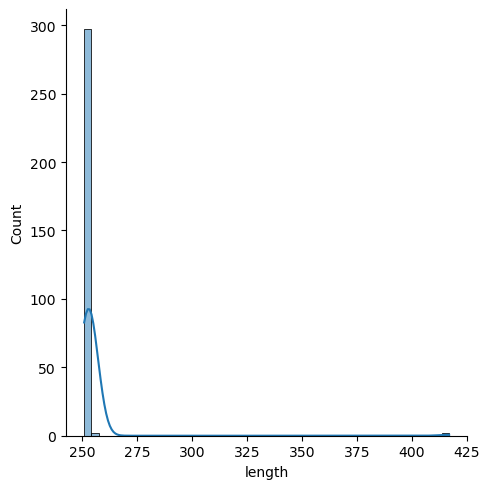

In [9]:
sns.displot(data=repseq_prop, x='length', kde=True, bins=50)

### Representative sequences: scatterplot of gaps vs length, color by taxonomy, size by observations, shape by outlier

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=repseq_prop, x='length', y='gaps', style='outlier', hue='taxonomy', size='observations', 
                sizes=(10,200), edgecolor=None)
ax.legend(bbox_to_anchor=(1.35, 1.0));

### Alpha-diversity boxplots

<AxesSubplot: xlabel='filter_size', ylabel='observed_features'>

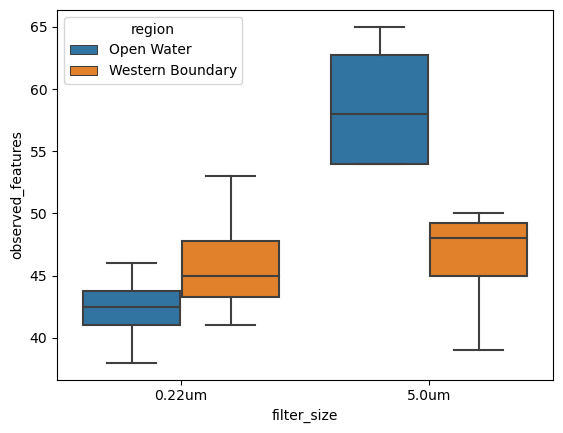

In [11]:
adiv_vector = Artifact.load(inputs['adiv_vector'])
df_adiv = adiv_vector.view(pd.Series)
df_adiv_md = pd.merge(df_md, df_adiv, left_index=True, right_index=True)
sns.boxplot(data=df_adiv_md, y=adiv_metric, x=factor1, hue=factor2)

## Display interactive visualizations

### Feature table

In [12]:
Visualization.load(inputs['table_viz'])

<visualization: Visualization uuid: bb98a141-27b1-48d4-a1e8-b0d70b2adf04>

### Representative sequences

In [13]:
Visualization.load(inputs['repseqs_viz'])

<visualization: Visualization uuid: 75545490-09f7-40e0-93c2-ddf57a7aa1ea>

### Rooted tree

In [14]:
Visualization.load(inputs['rooted_tree'])

<visualization: Visualization uuid: 24741731-3dd8-4211-82c7-bba54b1bdd25>

### Taxonomy

In [15]:
Visualization.load(inputs['taxonomy_viz'])

<visualization: Visualization uuid: e8a4c491-8c99-4213-8d8f-55c01f5aef6b>

### Taxonomy barplot

In [16]:
Visualization.load(inputs['taxa_bar'])

<visualization: Visualization uuid: cf37483e-dd8d-4d47-84b3-31eb3764fd9e>

### Alpha-diversity group significance

In [17]:
Visualization.load(inputs['adiv_grpsig'])

<visualization: Visualization uuid: 9d5b9cd2-53b9-4dc5-85ad-dd10103e2ee7>

### Beta-diversity PCoA Emperor plot

In [18]:
Visualization.load(inputs['bdiv_emperor'])

<visualization: Visualization uuid: 82705e54-10b2-4326-865c-6832a4de239b>

### Beta-diversity group significance

In [19]:
Visualization.load(inputs['bdiv_grpsig'])

<visualization: Visualization uuid: c07a42b8-0728-4b59-8652-dbf3fb684dca>